# **Mounting Drive into colab for accessing files**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Importing the necessary libraries**


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [0]:
## Reading the CSV file
vehicle=pd.read_csv("gdrive/My Drive/AIML/vehicle.csv")

In [0]:
## Displaying the measures of Dispersion and central tendency
vehicle.describe().transpose()

count        mean  ...    75%     max
compactness                  846.0   93.678487  ...  100.0   119.0
circularity                  841.0   44.828775  ...   49.0    59.0
distance_circularity         842.0   82.110451  ...   98.0   112.0
radius_ratio                 840.0  168.888095  ...  195.0   333.0
pr.axis_aspect_ratio         844.0   61.678910  ...   65.0   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.0    55.0
scatter_ratio                845.0  168.901775  ...  198.0   265.0
elongatedness                845.0   40.933728  ...   46.0    61.0
pr.axis_rectangularity       843.0   20.582444  ...   23.0    29.0
max.length_rectangularity    846.0  147.998818  ...  159.0   188.0
scaled_variance              843.0  188.631079  ...  217.0   320.0
scaled_variance.1            844.0  439.494076  ...  587.0  1018.0
scaled_radius_of_gyration    844.0  174.709716  ...  198.0   268.0
scaled_radius_of_gyration.1  842.0   72.447743  ...   75.0   135.0
skewness_about               840.0    6.364286  ...    9.0    22.0
skewness_about.1             845.0   12.602367  ...   19.0    41.0
skewness_about.2             845.0  188.919527  ...  193.0   206.0
hollows_ratio                846.0  195.632388  ...  201.0   211.0

[18 rows x 8 columns]

In [0]:
## Checking datatype, missing value and information of every column in the dataset
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [0]:
## Displaying the first few rows in the dataset
vehicle.head().transpose()

0    1    2    3    4
compactness                   95   91  104   93   85
circularity                   48   41   50   41   44
distance_circularity          83   84  106   82   70
radius_ratio                 178  141  209  159  205
pr.axis_aspect_ratio          72   57   66   63  103
max.length_aspect_ratio       10    9   10    9   52
scatter_ratio                162  149  207  144  149
elongatedness                 42   45   32   46   45
pr.axis_rectangularity        20   19   23   19   19
max.length_rectangularity    159  143  158  143  144
scaled_variance              176  170  223  160  241
scaled_variance.1            379  330  635  309  325
scaled_radius_of_gyration    184  158  220  127  188
scaled_radius_of_gyration.1   70   72   73   63  127
skewness_about                 6    9   14    6    9
skewness_about.1              16   14    9   10   11
skewness_about.2             187  189  188  199  180
hollows_ratio                197  199  196  207  183
class                        van  van  car  van  bus

In [0]:
## Checking for the dimension of the dataset
vehicle.shape

(846, 19)

In [0]:
## Checking for number of null/NA values in each column
vehicle.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [0]:
### Creating a copy of dataset into a new dataframe
vehicle_new=vehicle.copy()

**Imputing missing values or null values with median of that column**


In [0]:
vehicle_new.fillna(vehicle_new.median(),axis=0,inplace=True)

In [0]:
### Checking whether there are any null values.
vehicle_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [0]:
scatter=vehicle_new.drop(['class'],axis=1)

**Analysis of each independent variable with the help of plots**

In [0]:
column=vehicle_new.columns

In [0]:
column=column.drop('class')

In [0]:
column

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

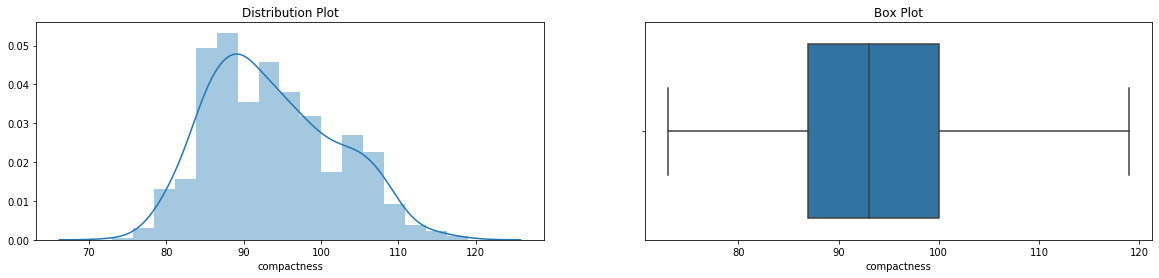

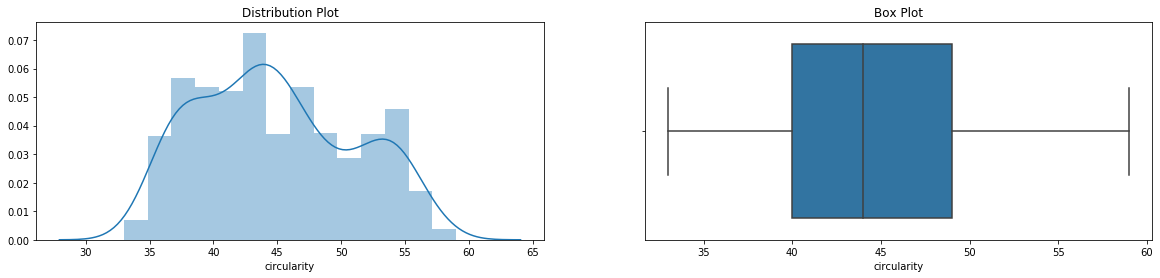

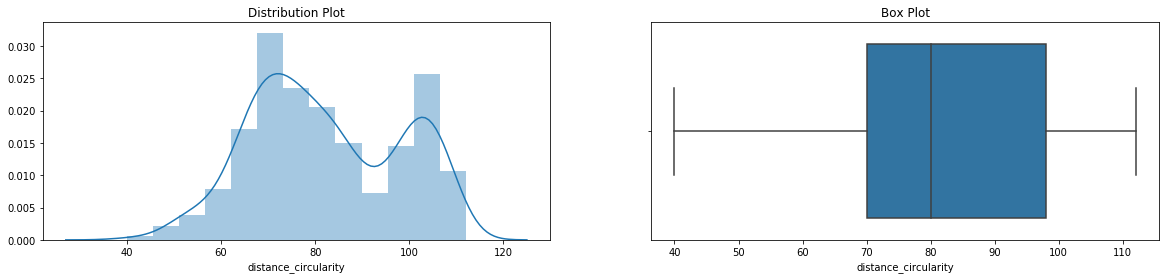

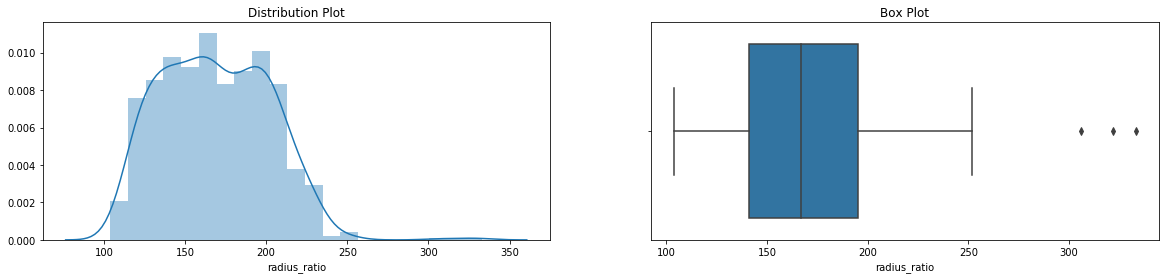

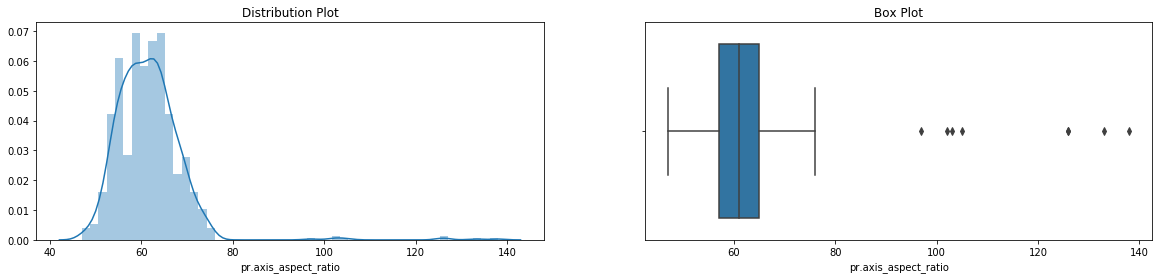

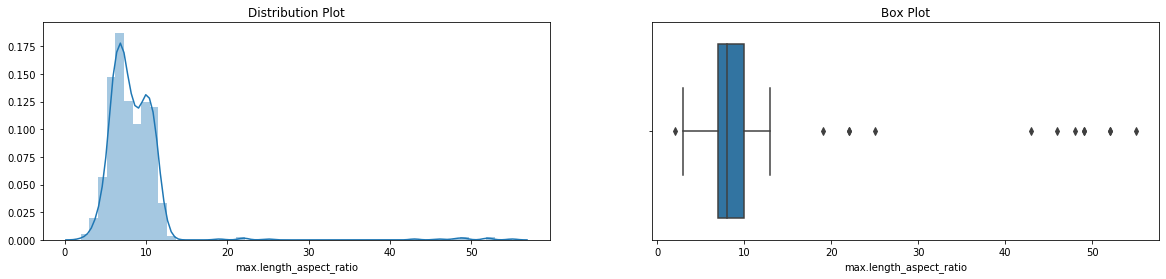

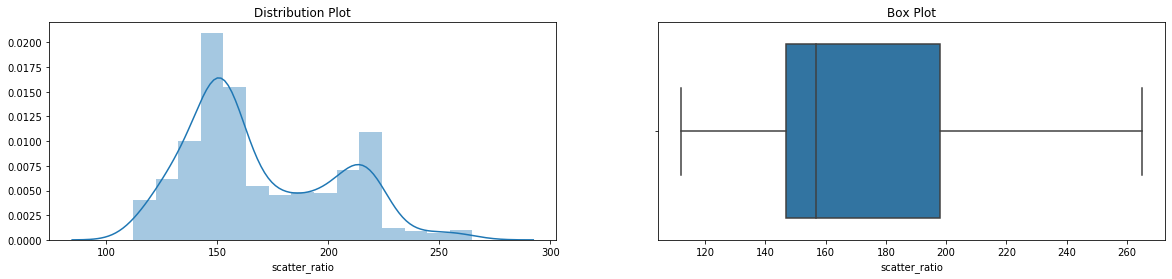

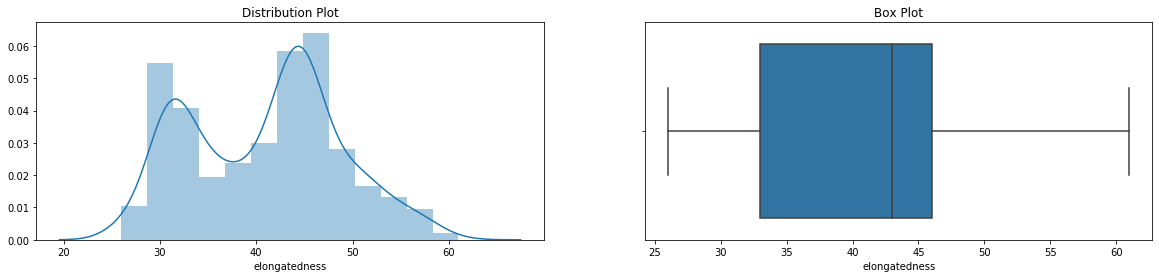

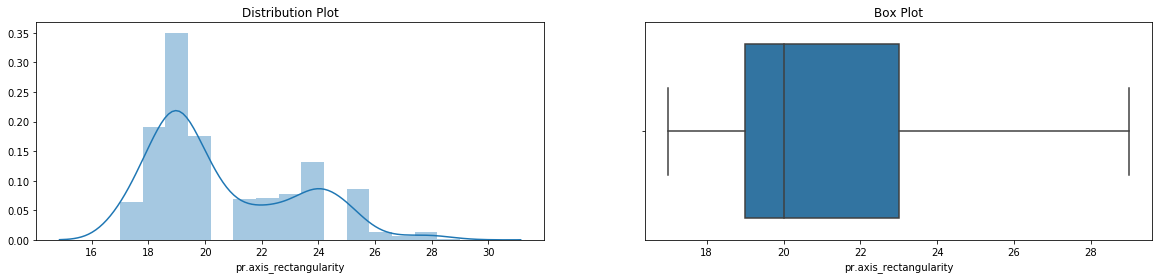

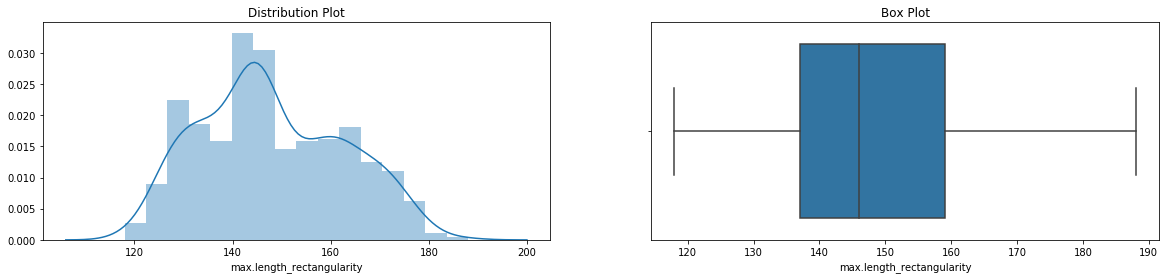

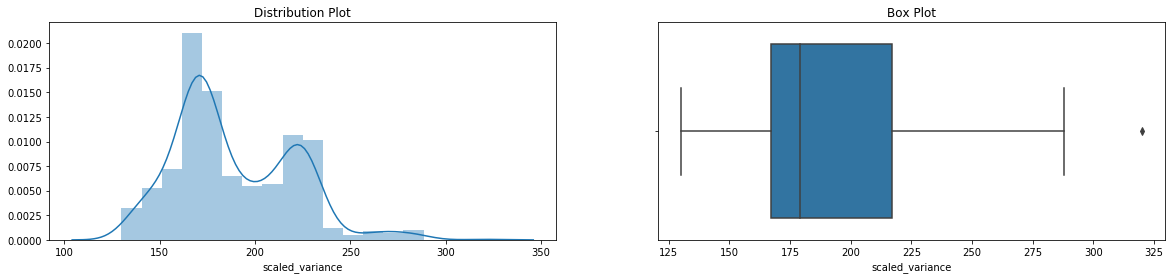

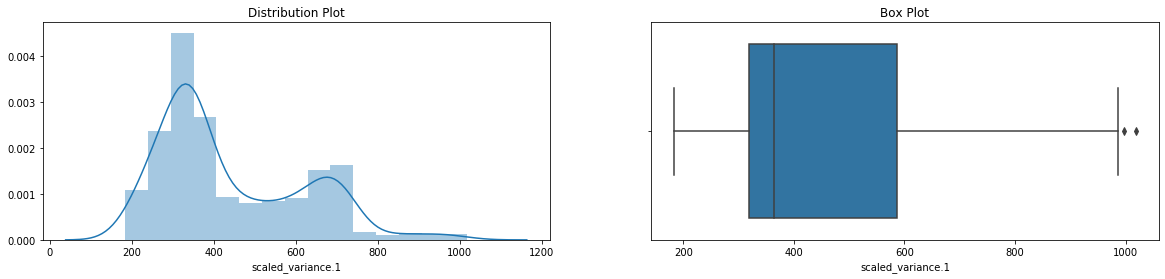

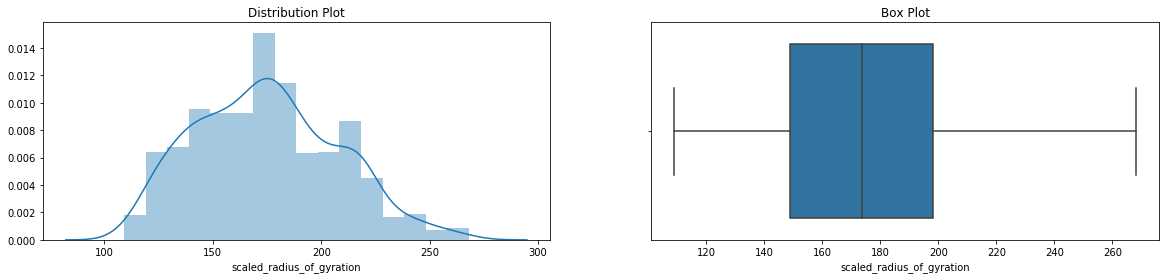

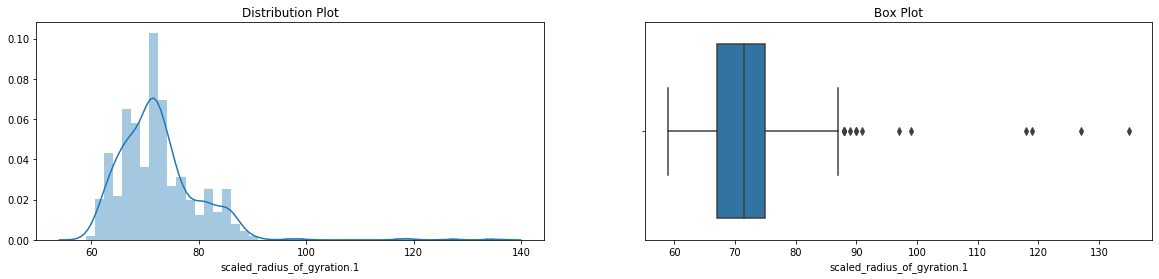

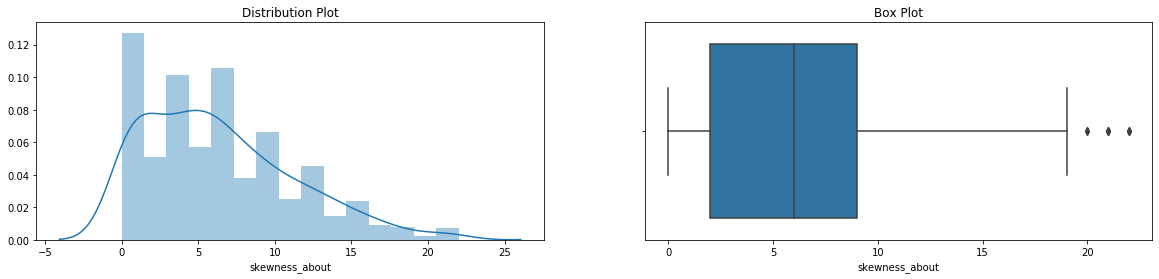

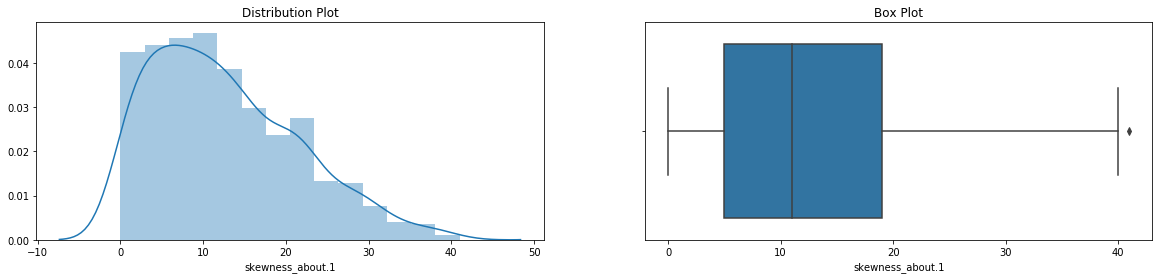

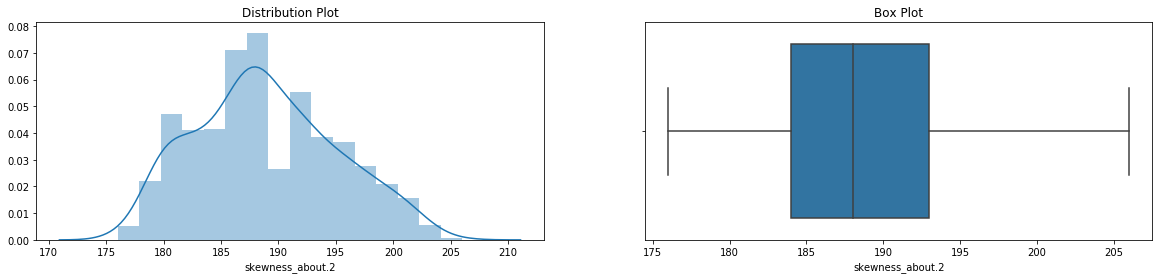

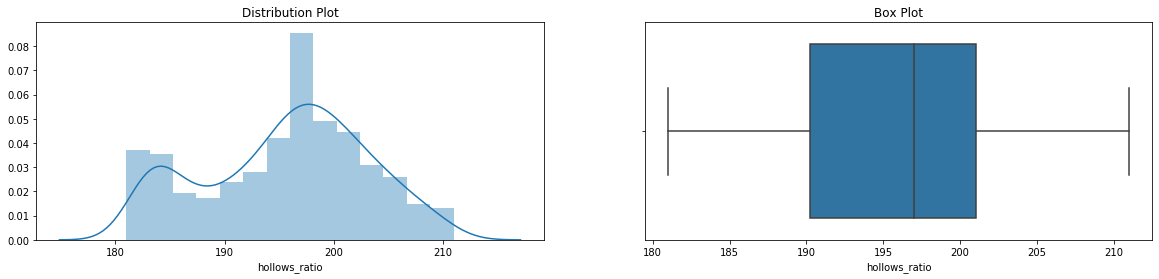

In [0]:
## Plotting the distribution and boxplot for each independent variable to detect outliers
for i in column:
  fig,ax = plt.subplots(1,2)
  fig.set_size_inches(20,4)
  sns.distplot(vehicle_new[i],ax=ax[0])
  ax[0].set_title("Distribution Plot")
  sns.boxplot(vehicle_new[i],ax=ax[1])
  ax[1].set_title("Box Plot")

**Interpretations of above distributions:**

1) compactness - The plot is normally distributed and there are no outliers present in the data

2) circularity- The plot is normally distributed and there are no outliers present in the data

3) distance_circularity - There are no outliers in data but the curve is right skewed with two peaks.

4) radius_ratio - Curve is normally distributed with outliers present in data and its skewed towards right as tail is long on right side(mean>median)

5) pr.axis_aspect_ratio- Curve is normally distributed with outliers present in data and its skewed towards right as tail is long on right side(mean>median)

6) max.length_aspect_ratio- Curve is normally distributed with outliers present in both sides of data and its skewed towards right as tail is long on right side(mean>median)

7) scatter_ratio - There are no outliers in data but the distribution is right skewed with two peaks.

8) elongatedness - There are no outliers in data but the distribution is left skewed as tail is long on left side with two peaks.

9) pr.axis_rectangularity - There are no outliers in data but the distribution is right skewed with two peaks.

10) max.length_rectangularity - There are no outliers in data but the distribution is right skewed with two peaks.

11) scaled_variance - There are outliers in data and the distribution is right skewed with two peaks.

12) scaled_variance.1 -  There are outliers in data and the distribution is right skewed with two peaks.

13) scaled_radius_of_gyration - There are no outliers in data but the distribution is right skewed with two peaks.

14) scaled_radius_of_gyration.1 - Distribution curve has outliers present in data and its skewed towards right as tail is long on right side(mean>median)

15) skewness_about - Distribution curve has outliers in data and its skewed towards right as tail is long on right side(mean>median)

16) skewness_about.1 - Distribution curve has outliers in data and its skewed towards right as tail is long on right side(mean>median)

17) skewness_about.2 - There are no outliers in data but the distribution is left skewed.

18) hollows_ratio - There are no outliers in data but the distribution is left skewed with two peaks.


# **Checking for the outlier value and removing them for better analysis**

**From the distribution and box plot obtained above, founded the variables which are suffering from outliers.**

**Now trying to find the upper, lower quartile and interquartile range values and using them to find the value above/below which we may detect with outliers inorder to remove them**

In [0]:
q1 = np.quantile(vehicle_new['radius_ratio'],0.25)
q2 = np.quantile(vehicle_new['radius_ratio'],0.50)
q3 = np.quantile(vehicle_new['radius_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius ratio above",vehicle_new['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius ratio column are",vehicle_new[vehicle_new['radius_ratio']>276]['radius_ratio'].shape[0])

Quartile1:: 141.0
Quartile2:: 167.0
Quartile3:: 195.0
Inter Quartile Range:: 54.0
radius ratio above 276.0 are outliers
The Outliers in radius ratio column are 3


In [0]:
q1 = np.quantile(vehicle_new['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(vehicle_new['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(vehicle_new['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",vehicle_new['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",vehicle_new[vehicle_new['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartile1:: 57.0
Quartile2:: 61.0
Quartile3:: 65.0
Inter Quartile Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


In [0]:
q1 = np.quantile(vehicle_new['max.length_aspect_ratio'],0.25)
q2 = np.quantile(vehicle_new['max.length_aspect_ratio'],0.50)
q3 = np.quantile(vehicle_new['max.length_aspect_ratio'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",vehicle_new['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",vehicle_new['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The Outliers in max.length_aspect_ratio column are",vehicle_new[vehicle_new['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The Outliers in max.length_aspect_ratio column below are",vehicle_new[vehicle_new['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartile1:: 7.0
Quartile2:: 8.0
Quartile3:: 10.0
Inter Quartile Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The Outliers in max.length_aspect_ratio column are 12
The Outliers in max.length_aspect_ratio column below are 1


In [0]:
q1 = np.quantile(vehicle_new['scaled_variance'],0.25)
q2 = np.quantile(vehicle_new['scaled_variance'],0.50)
q3 = np.quantile(vehicle_new['scaled_variance'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",vehicle_new['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",vehicle_new[vehicle_new['scaled_variance']>292]['scaled_variance'].shape[0])

Quartile1:: 167.0
Quartile2:: 179.0
Quartile3:: 217.0
Inter Quartile Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


In [0]:
q1 = np.quantile(vehicle_new['scaled_variance.1'],0.25)
q2 = np.quantile(vehicle_new['scaled_variance.1'],0.50)
q3 = np.quantile(vehicle_new['scaled_variance.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",vehicle_new['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",vehicle_new[vehicle_new['scaled_variance.1']>989.5]['scaled_variance.1'].shape[0])

Quartile1:: 318.25
Quartile2:: 363.5
Quartile3:: 586.75
Inter Quartile Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2


In [0]:
q1 = np.quantile(vehicle_new['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(vehicle_new['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(vehicle_new['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",vehicle_new['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",vehicle_new[vehicle_new['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartile1:: 67.0
Quartile2:: 71.5
Quartile3:: 75.0
Inter Quartile Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


In [0]:
q1 = np.quantile(vehicle_new['skewness_about'],0.25)
q2 = np.quantile(vehicle_new['skewness_about'],0.50)
q3 = np.quantile(vehicle_new['skewness_about'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",vehicle_new['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",vehicle_new[vehicle_new['skewness_about']>19.5]['skewness_about'].shape[0])

Quartile1:: 2.0
Quartile2:: 6.0
Quartile3:: 9.0
Inter Quartile Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


In [0]:
q1 = np.quantile(vehicle_new['skewness_about.1'],0.25)
q2 = np.quantile(vehicle_new['skewness_about.1'],0.50)
q3 = np.quantile(vehicle_new['skewness_about.1'],0.75)
IQR = q3-q1
print("Quartile1::",q1)
print("Quartile2::",q2)
print("Quartile3::",q3)
print("Inter Quartile Range::",IQR)
#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",vehicle_new['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",vehicle_new[vehicle_new['skewness_about.1']>40]['skewness_about.1'].shape[0])

Quartile1:: 5.0
Quartile2:: 11.0
Quartile3:: 19.0
Inter Quartile Range:: 14.0
skewness_about.1 above 40.0 are outliers
The Outliers in skewness_about.1 column are 1


## **Removing the outliers as they will have an impact in further PCA and SVM analysis**

**Eventhough the outliers are found not being obtained due to any kind of human errors or artificially imputed and are naturally high values within the acceptable range**

**Taking into account PCA and SVM results which may get affected by outliers. The outliers are removed with the values obtained above:**

In [0]:
vehicle_new.drop(vehicle_new[vehicle_new['radius_ratio']>276].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['scaled_variance']>292].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['scaled_variance.1']>989.5].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['skewness_about']>19.5].index,axis=0,inplace=True)
vehicle_new.drop(vehicle_new[vehicle_new['skewness_about.1']>40].index,axis=0,inplace=True)

In [0]:
## The new dimension of the dataframe after the rows having outliers are removed.
vehicle_new.shape

(813, 19)

In [0]:
## Displaying the distribution of class values
vehicle_new['class'].value_counts()

car    416
bus    208
van    189
Name: class, dtype: int64

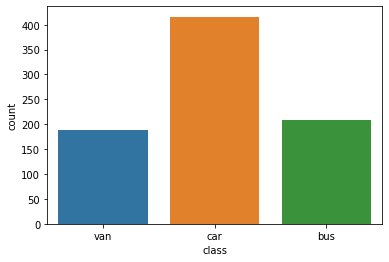

In [0]:
## Plotting the class variable to find the distribution
sns.countplot(vehicle_new['class'])
plt.show()

In [0]:
vehicle_new['class'].head()

0    van
1    van
2    car
3    van
5    bus
Name: class, dtype: object

In [0]:
## Creating a dataframe with only independent variables.
scatter=vehicle_new.drop(['class'],axis=1)

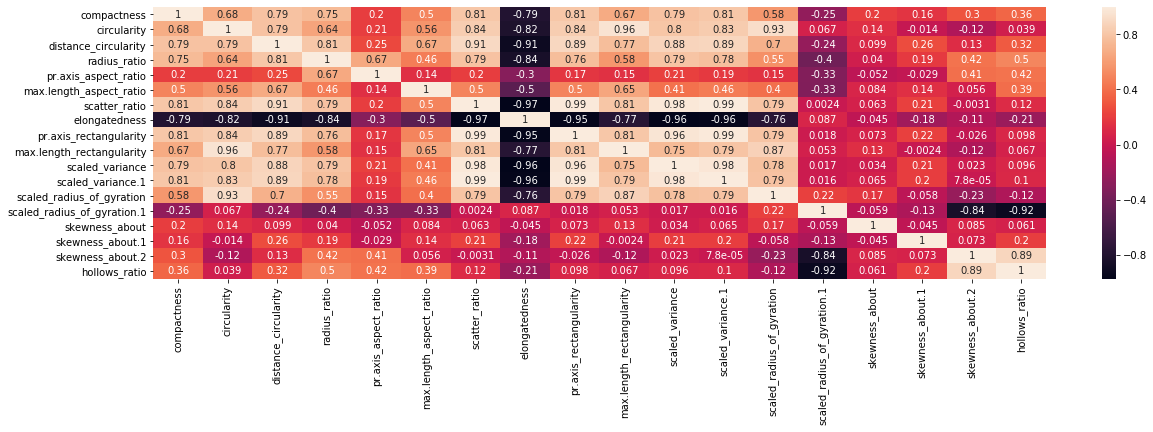

In [0]:
## Plotting the correlation matrix to find the multicollinearity between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(scatter.corr(),annot=True)
plt.show()

From above correlation matrix we can see that there are many features which are highly correlated.

There are many variables which possess multicollinearity between them. Many variables are found to have correlation coefficient value between 0.80 to 1.00.

They are needed to be removed as its not better to take these multicollinear variables into analysis.
The variables are: 
'max.length_rectangularity' 

'scaled_radius_of_gyration' 

'skewness_about.2' 

'scatter_ratio' 

'elongatedness' 

'pr.axis_rectangularity' 

'scaled_variance' 

'scaled_variance.1'

## **Principal Component Analysis and SVM Analysis**

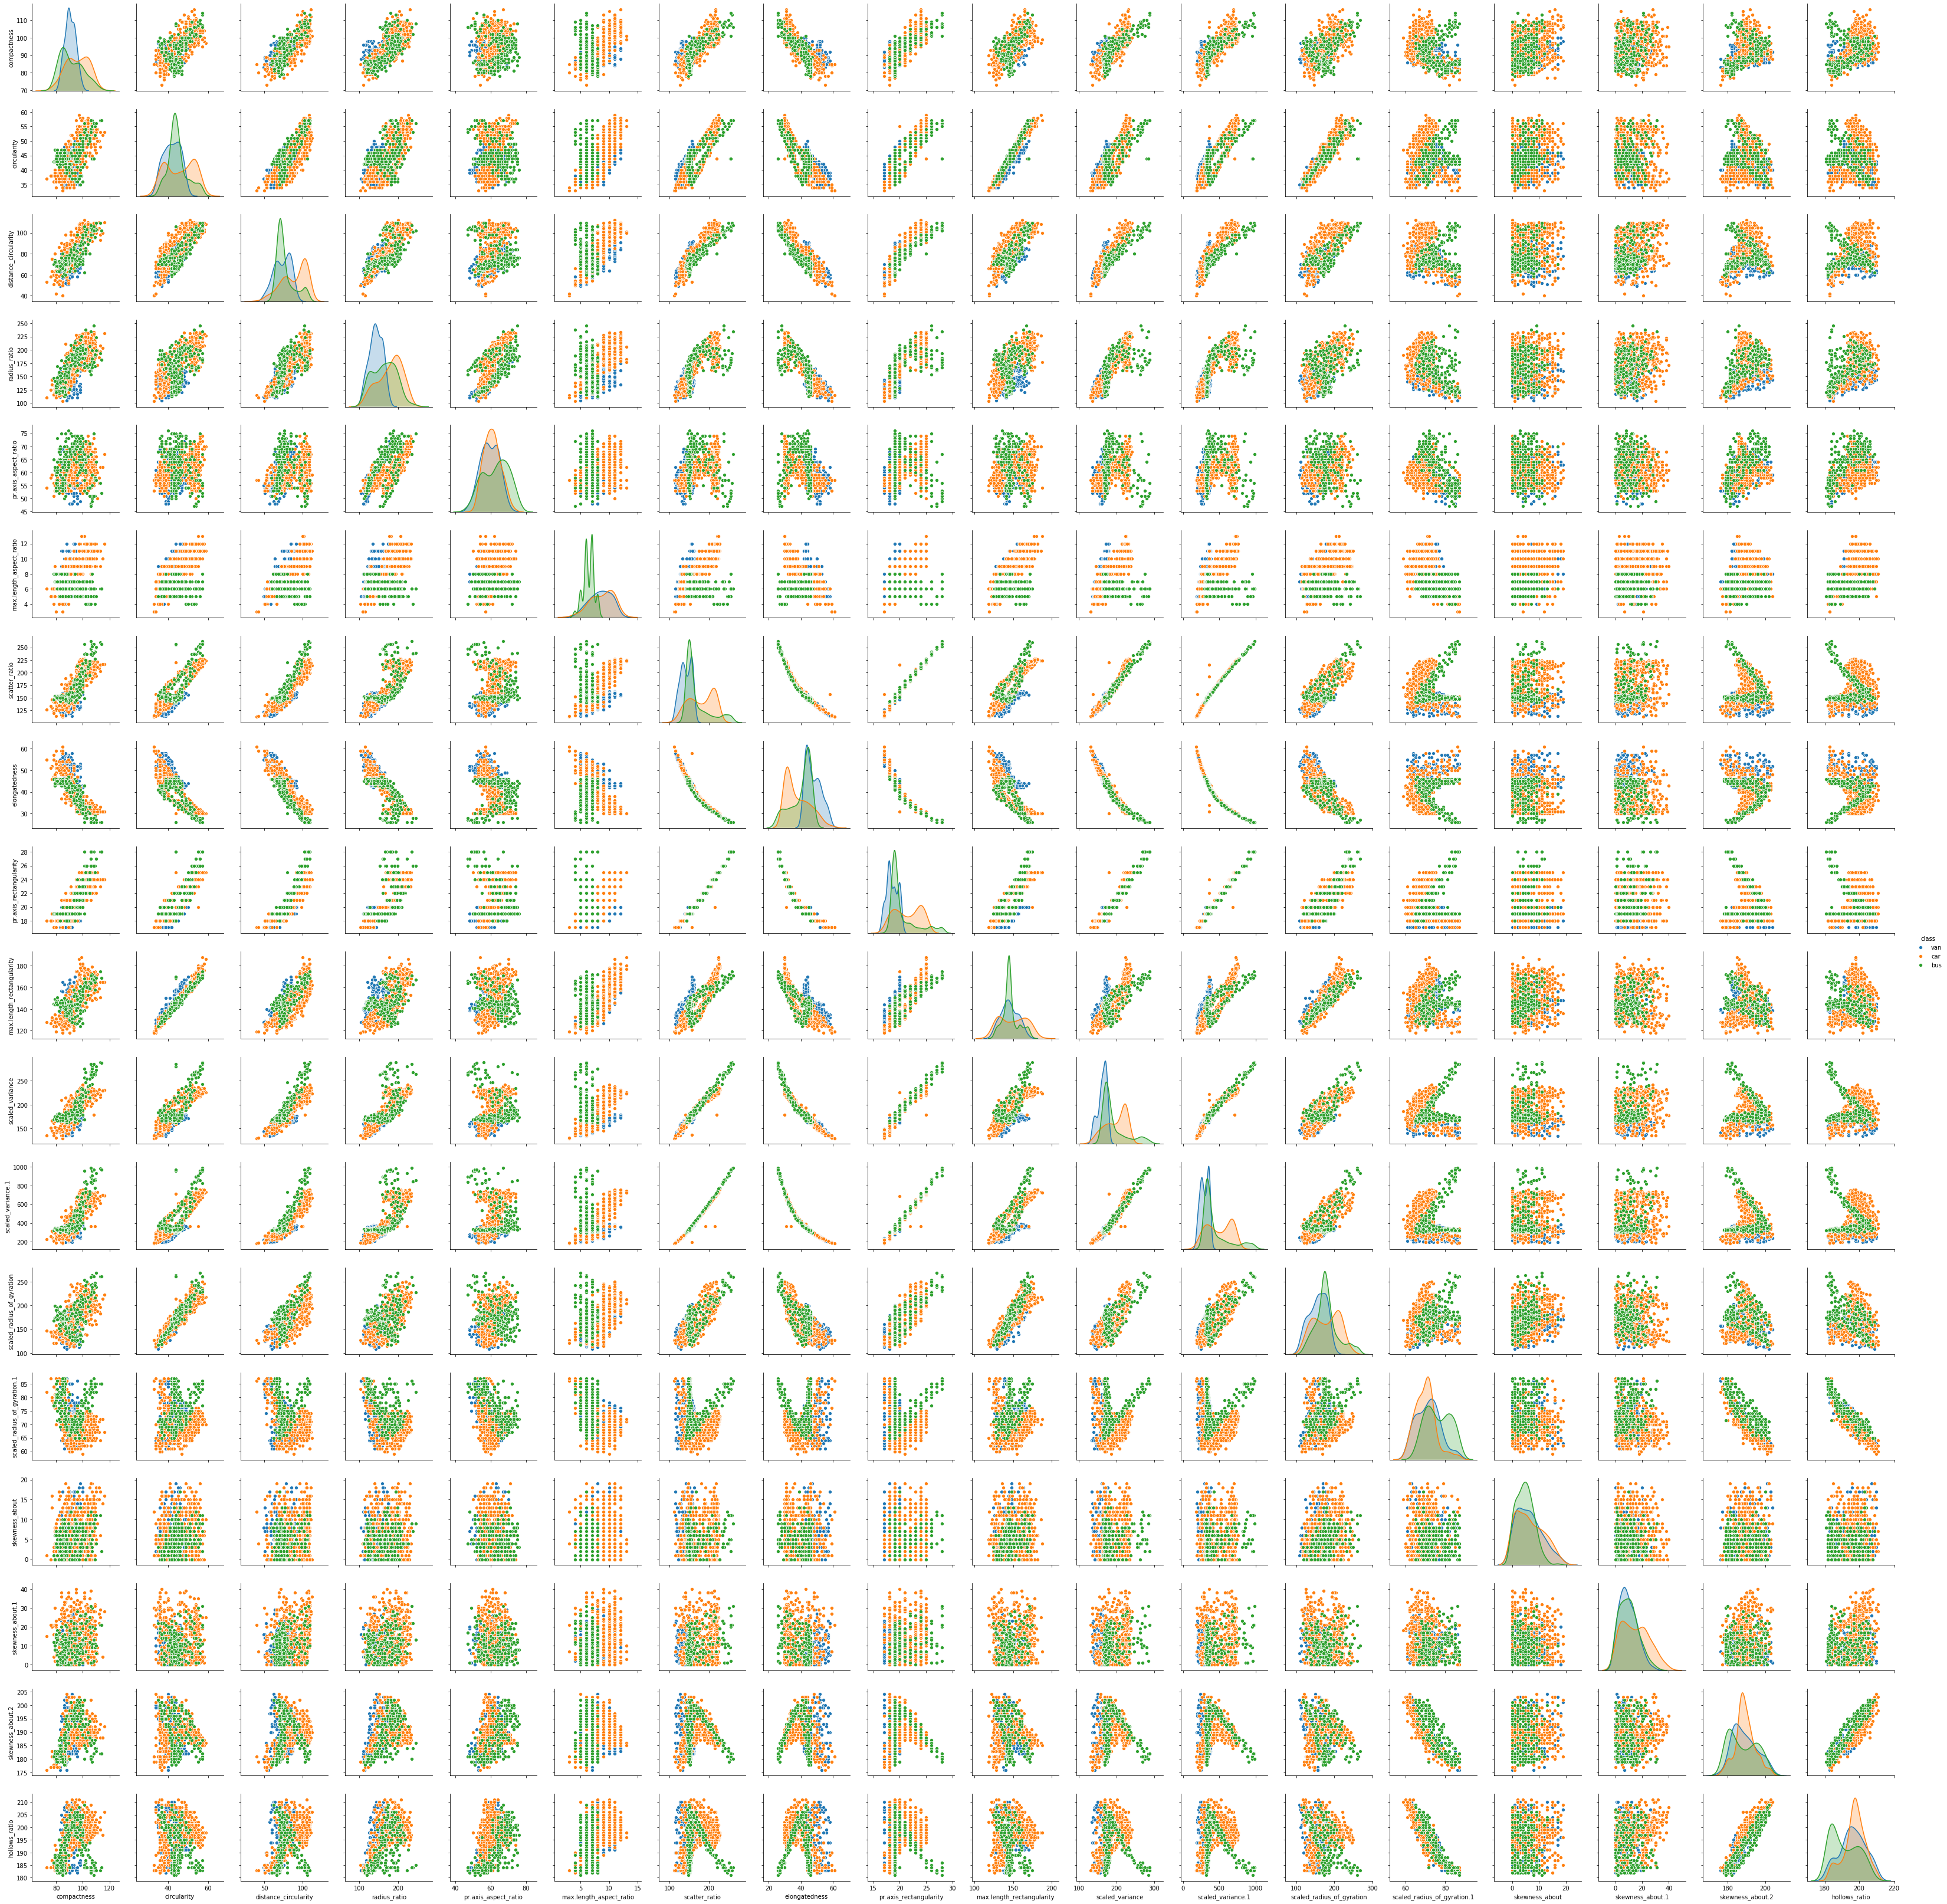

In [0]:
sns.pairplot(vehicle_new, diag_kind='kde',hue='class')

In [0]:
## Splitting the data into independent and target variables
X=vehicle_new.drop(['class'],axis=1)
y=vehicle_new['class']

In [0]:
## Replacing the string variables with integer in target variable for analysis
y=y.replace({'car':0,'bus':1,'van':2})

In [0]:
y.head()

0    2
1    2
2    0
3    2
5    1
Name: class, dtype: int64

In [0]:
vehicle_new['class'].head()

0    van
1    van
2    car
3    van
5    bus
Name: class, dtype: object

In [0]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [0]:
## Scaling the independent attributes before applying PCA and SVM models
X_scaled=X.apply(zscore)

In [0]:
## Splitting the data into train and test at ratio of 70:30
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3 , random_state=10)


In [0]:
## Initialising and creating a covariance matrix for train data
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.01168367  0.67969866  0.80277818  0.71993318  0.14595143  0.49517287
   0.8317426  -0.80191269  0.83264045  0.69030771  0.81222144  0.84018986
   0.59652391 -0.22284453  0.20670381  0.1353187   0.28799534  0.35279386]
 [ 0.67969866  1.01485128  0.80220282  0.61818479  0.15832644  0.56827768
   0.86465011 -0.82666225  0.85925602  0.98424586  0.8174445   0.85693012
   0.94685911  0.08888027  0.16155692 -0.00551153 -0.14133022  0.02679482]
 [ 0.80277818  0.80220282  1.00595242  0.78631552  0.20736381  0.66827122
   0.9290165  -0.92268189  0.91531787  0.79885888  0.90086284  0.91568409
   0.72368559 -0.2024953   0.11913042  0.24400001  0.11304313  0.30100819]
 [ 0.71993318  0.61818479  0.78631552  0.96179105  0.6495411   0.45601305
   0.76975693 -0.82327842  0.74215678  0.56362551  0.76780797  0.76005541
   0.53386968 -0.38259173  0.03819895  0.14171067  0.40804188  0.49923411]
 [ 0.14595143  0.15832644  0.20736381  0.6495411   1.04945739  0.13180469
   0.1469109

In [0]:
## Finding the eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.70994733e-01 -9.54150530e-02  9.88153375e-02  1.07092893e-01
  -1.82917054e-01  2.41999081e-01 -1.77255672e-01 -7.72343840e-01
   3.65860525e-01  8.52352668e-02 -5.02002543e-03  1.99809225e-02
   1.62461033e-03  6.55965285e-03  3.69080545e-02 -1.81869146e-01
  -1.19199792e-02  9.89559687e-03]
 [-2.86526141e-01  1.18278157e-01  1.39900321e-01 -1.65515164e-01
   1.50325284e-01 -5.73516989e-02  3.94795842e-01 -4.34945009e-02
   7.39809658e-02 -2.58573516e-01 -4.26616087e-02  2.63642713e-01
   6.90943014e-04  6.69536945e-02  3.96916132e-01  3.08395767e-02
   5.67828493e-01  2.10324359e-01]
 [-3.00970878e-01 -5.06588186e-02  5.34615192e-03  1.19048203e-01
   8.69995510e-02 -3.11302948e-03 -1.60151841e-01  2.71144276e-01
   3.09319812e-01  5.43355820e-02 -7.68907315e-01 -2.69592036e-01
   3.47235329e-03 -1.33263436e-02  2.52495221e-02  9.54940942e-02
   6.65499822e-02 -9.48582112e-02]
 [-2.57954372e-01 -2.21256152e-01 -1.95115516e-01 -1.66015679e-01
  -9.25459624e-02 -

In [0]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


0         1         2   ...        15        16        17
0  9.925926  3.446002  1.197103  ...  0.027061  0.020701  0.019169

[1 rows x 18 columns]

In [0]:
## Computing the cumulative variance explained using the eigen values obtained.
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.44565589  73.34765269  79.91399539  86.26965106  91.12607699
  94.76139653  96.61501236  97.82174239  98.41909606  98.84819677
  99.17902379  99.41589792  99.58227526  99.73070743  99.84425769
  99.94940261  99.99807841 100.        ]


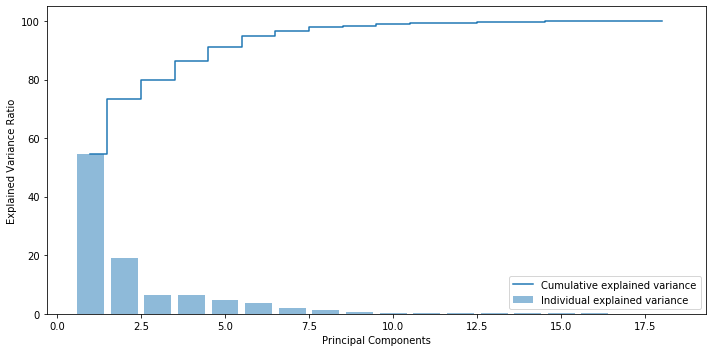

In [0]:
# Ploting elbow plot (Step and bar graph) to find the point at which 95% of variance is being explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [0]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]



P_reduce = np.array(eigvectors_sort[0:8]).transpose()   # Selecting first few eigen vectors of all 18

Proj_train_data = np.dot(X_train,P_reduce)   # projecting training data onto the eight eigen vectors

Proj_test_data = np.dot(X_test,P_reduce)    # projecting test data onto the eight eigen vectors

# ***From the cumulative variance explained by PCA components and the elbow plot, more than 95% variance is explained between 7th and 8th PCA component. So as a better option taking upto 8 principal components for further analysis and svm model is being run on it.***

In [0]:
# complete matrix operation 
print(y_train.shape)
X_train.shape, P_reduce.shape, Proj_train_data.shape

(569,)


((569, 18), (18, 8), (569, 8))

**Running SVM model on the raw data without removing any columns or doing PCA analysis**

In [0]:
from sklearn import svm
clf = svm.SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
clf.score(X_test, y_test)

0.9672131147540983

In [0]:
y_pred=clf.predict(X_test)

# **Using GridsearchCV to find the optimal value for C and kernel from a specified set of values given into the search**

In [0]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
model = SVC() 

# defining parameter range 
param_grid = {'C': [0.1, 0.05,0.5,1], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(Proj_train_data, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.",

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.796, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.816, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.777, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.864, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.868, total=   0.0s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.883, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.05, 0.5, 1], 'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [0]:
grid.score(Proj_test_data, y_test)

0.9590163934426229

In [0]:
pca_pred=grid.predict(Proj_test_data)

In [0]:
from sklearn.model_selection import cross_val_score
clf1 = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf1, Proj_test_data, y_test, cv=5)
scores

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

array([0.94      , 0.9       , 0.93877551, 0.91666667, 1.        ])

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.94 (+/- 0.03)


## **Removing the Multicollinear variables manually from the dataframe and running the SVM model for the same**

In [0]:
X1=X_scaled.drop(['max.length_rectangularity' ,'scaled_radius_of_gyration' ,'skewness_about.2' ,'scatter_ratio' ,'elongatedness' ,'pr.axis_rectangularity' ,'scaled_variance' ,'scaled_variance.1' ],axis=1)

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3 , random_state=10)

In [0]:
clf2 = svm.SVC(C=1, kernel='rbf')
clf2.fit(X1_train, y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
clf2.score(X1_test, y1_test)

0.9467213114754098

In [0]:
y1_pred=clf2.predict(X1_test)

# **Printing the confusion matrix and Accuracy score for all models**

In [0]:
#display confusion matrix of both models
print("Confusion matrix with raw data(18 dimension)\n",confusion_matrix(y_test,y_pred))
print("Confusion matrix with impute pca data(7 dimension)\n",confusion_matrix(y_test,pca_pred))
print("Confusion matrix with removing multicollinear data(10 dimension)\n",confusion_matrix(y1_test,y1_pred))

Confusion matrix with raw data(18 dimension)
 [[129   1   3]
 [  1  56   2]
 [  1   0  51]]
Confusion matrix with impute pca data(7 dimension)
 [[129   2   2]
 [  2  56   1]
 [  2   1  49]]
Confusion matrix with removing multicollinear data(10 dimension)
 [[129   2   2]
 [  2  55   2]
 [  3   2  47]]


In [0]:
#display confusion matrix of both models
print("Accuracy with raw data(18 dimension)\n",accuracy_score(y_test,y_pred))
print("Accuracy with impute pca data(7 dimension)\n",accuracy_score(y_test,pca_pred))
print("Accuracy with removing multicollinear data(10 dimension)\n",accuracy_score(y1_test,y1_pred))

Accuracy with raw data(18 dimension)
 0.9672131147540983
Accuracy with impute pca data(7 dimension)
 0.9590163934426229
Accuracy with removing multicollinear data(10 dimension)
 0.9467213114754098


**From above we can see that pca is doing a very good job.Accuracy with pca is approx 95% and with raw data approx 96% but note that pca 95% accuracy is with only 8 dimension where as rawdata has 18 dimension.**

**More than removing variables that have multicollinearity and checking for accuracy in the model, PCA has done a very good dimensionality reduction in this case with a better accuracy.**

**But one thing is PCA is a black box which cannot be predicted on what basis dimensions are being reduced and what internally took place to get a better accuracy and results.**